In [1]:
import glob
import os
import sys
sys.path.append("..\\")

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.data_handling import data_loading, data_visualize
from src.models.convnet_model import ConvnetModel

# Data loading

In [2]:
train_val_data = data_loading.load_data("..\\data\\train")
test_data = data_loading.load_data("..\\data\\val")

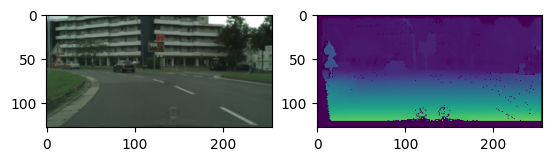

In [3]:
data_visualize.visualize_image_depth(train_val_data["img"][0], train_val_data["depth"][0])

## Training

In [5]:
model = ConvnetModel()

model.train(
    np.array(train_val_data["img"]),
    np.array(train_val_data["depth"]),
    n_epochs=20,
    lr=0.001,
)

100%|██████████| 149/149 [00:28<00:00,  5.22it/s]


Epoch [1/20] - Train Loss: 0.0292 - Val Loss: 0.0257


100%|██████████| 149/149 [00:27<00:00,  5.39it/s]


Epoch [2/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:27<00:00,  5.39it/s]


Epoch [3/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:27<00:00,  5.40it/s]


Epoch [4/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:27<00:00,  5.39it/s]


Epoch [5/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:27<00:00,  5.39it/s]


Epoch [6/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:27<00:00,  5.37it/s]


Epoch [7/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:28<00:00,  5.27it/s]


Epoch [8/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:28<00:00,  5.17it/s]


Epoch [9/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:28<00:00,  5.16it/s]


Epoch [10/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.12it/s]


Epoch [11/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.11it/s]


Epoch [12/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.10it/s]


Epoch [13/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.09it/s]


Epoch [14/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.11it/s]


Epoch [15/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.09it/s]


Epoch [16/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.09it/s]


Epoch [17/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.08it/s]


Epoch [18/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.08it/s]


Epoch [19/20] - Train Loss: 0.0256 - Val Loss: 0.0257


100%|██████████| 149/149 [00:29<00:00,  5.08it/s]


Epoch [20/20] - Train Loss: 0.0256 - Val Loss: 0.0257


In [7]:
np.transpose(train_val_data["img"][0][np.newaxis], (0, 3, 1, 2))

array([[[[0.68627451, 0.67058824, 0.49411765, ..., 0.17254902,
          0.1254902 , 0.1372549 ],
         [0.68235294, 0.6627451 , 0.50196078, ..., 0.17647059,
          0.15294118, 0.15686275],
         [0.67843137, 0.65882353, 0.50980392, ..., 0.23921569,
          0.18823529, 0.14117647],
         ...,
         [0.33333333, 0.33333333, 0.33333333, ..., 0.21568627,
          0.21568627, 0.21568627],
         [0.32941176, 0.32941176, 0.32941176, ..., 0.21568627,
          0.21568627, 0.21176471],
         [0.32156863, 0.32156863, 0.3254902 , ..., 0.21568627,
          0.21568627, 0.21176471]],

        [[0.80784314, 0.79607843, 0.61568627, ..., 0.22352941,
          0.17647059, 0.19215686],
         [0.8       , 0.79215686, 0.62352941, ..., 0.23137255,
          0.20392157, 0.21960784],
         [0.8       , 0.78823529, 0.63529412, ..., 0.30588235,
          0.24313725, 0.19215686],
         ...,
         [0.40392157, 0.40392157, 0.40392157, ..., 0.28235294,
          0.27843137, 0.2

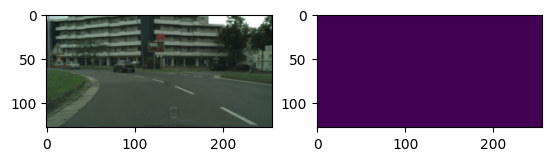

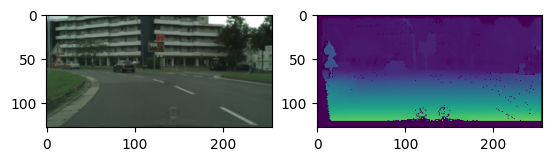

In [11]:
x = torch.Tensor(np.transpose(train_val_data["img"][0][np.newaxis], (0, 3, 1, 2)))
x = x.to(device='cuda')
d = model._model(x).detach().cpu().numpy()[0]
d = np.transpose(d, (1, 2, 0))

data_visualize.visualize_image_depth(train_val_data["img"][0], d)
data_visualize.visualize_image_depth(train_val_data["img"][0], train_val_data["depth"][0])